In [1]:
import os
import sys
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('../tunned_student_data.xlsx')
df.head()

,indique su edad,indique el género con el cual se identifica,indique el tipo de establecimiento educacional de procedenci,indique el rango de su puntaje obtenido en la prueba de sele,indique el rango en el que se ubica el promedio de sus notas,puedo comprender en profundidad el contenido de los cursos d,puedo manejar los contenidos incluso en los cursos más avanz,puedo hacer un excelente trabajo resolviendo problemas y en,"comparado con otros estudiantes, ¿cuán bien esperas que te v","del 1 al 5, en una escala de mal a mejor, ¿cómo crees que se",...,el (la) profesor(a) ofreció nuevas ideas y perspectivas acer,disfruté siendo un(a) estudiante de este curso,este curso cumplió mis expectativas,adquirí herramientas para el desarrollo de mis habilidades,estoy satisfecho(a) con la educación recibida en este curso,logré los resultados de aprendizaje del curso,la carga de este curso fue muy alta,este curso fue muy complejo,este es/fue un curso muy relevante para mi formación,"mi nota final del curso, ¿en qué cuartil se encontrará o se"
0,24,Masculino,Subvencionado,Entre 701 y 750,"Entre 6,5 y 7,0",4,5,4,Mejor,5,...,4,4,4,5,5,4,1,2,5,Dentro de las más altas del curso.
1,23,Femenino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",3,3,3,Peor,3,...,4,3,4,4,4,4,4,3,4,En el promedio.
2,25,Masculino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",4,5,4,Mejor,5,...,5,5,4,5,5,5,2,2,5,En el promedio.
3,23,Masculino,Subvencionado,Entre 601 y 650,"Entre 6,0 y 6,4",4,3,4,Peor,4,...,4,5,5,5,5,5,3,3,3,En el promedio.
4,20,Femenino,Subvencionado,Entre 551 y 600,"Entre 6,0 y 6,4",5,4,5,Mejor,4,...,0,0,0,0,0,0,0,0,0,NaN


## Analyzing Zeros

In [48]:
print(df_control_a.isna().sum())
print((df_control_a == 0).astype(int).sum(axis=0))

puedo comprender en profundidad el contenido de los cursos d    0
puedo manejar los contenidos incluso en los cursos más avanz    0
puedo hacer un excelente trabajo resolviendo problemas y en     0
dtype: int64
puedo comprender en profundidad el contenido de los cursos d    24
puedo manejar los contenidos incluso en los cursos más avanz    24
puedo hacer un excelente trabajo resolviendo problemas y en     24
dtype: int64


In [49]:
print(df_relative_student.isna().sum())
print((df_relative_student == 0).astype(int).sum(axis=0))

la carga de este curso fue muy alta                               0
este curso fue muy complejo                                       0
este es/fue un curso muy relevante para mi formación              0
mi nota final del curso, ¿en qué cuartil se encontrará o se     108
dtype: int64
la carga de este curso fue muy alta                             108
este curso fue muy complejo                                     108
este es/fue un curso muy relevante para mi formación            108
mi nota final del curso, ¿en qué cuartil se encontrará o se       0
dtype: int64


## Empty values
There is a problem with empty data, this is gonna be deleted for factor analysis purposes

In [63]:
df_transform = df.copy()

df_transform = df_transform[(df_transform[df_transform.columns[61:63]] != 0).all(1)]
df_transform = df_transform.reset_index()

In [67]:
df_filter = df_transform.select_dtypes(exclude=['object'])

In [69]:
df_filter = df_filter[df_filter.columns[2:]]
df_filter

,puedo comprender en profundidad el contenido de los cursos d,puedo manejar los contenidos incluso en los cursos más avanz,puedo hacer un excelente trabajo resolviendo problemas y en,"del 1 al 5, en una escala de mal a mejor, ¿cómo crees que se",ser un/a buen/a estudiante de mi carrera es parte importante,cumplir con las tareas de mi carrera es muy importante para,el éxito de la facultad/escuela a la que pertenece mi carrer,molesto(a),hostil,alerta,...,el (la) profesor(a) usó diversos métodos para transferir con,el (la) profesor(a) ofreció nuevas ideas y perspectivas acer,disfruté siendo un(a) estudiante de este curso,este curso cumplió mis expectativas,adquirí herramientas para el desarrollo de mis habilidades,estoy satisfecho(a) con la educación recibida en este curso,logré los resultados de aprendizaje del curso,la carga de este curso fue muy alta,este curso fue muy complejo,este es/fue un curso muy relevante para mi formación
0,4,5,4,5,3,3,2,2,2,4,...,5,4,4,4,5,5,4,1,2,5
1,3,3,3,3,1,2,1,4,4,3,...,4,4,3,4,4,4,4,4,3,4
2,4,5,4,5,3,2,3,1,2,2,...,4,5,5,4,5,5,5,2,2,5
3,4,3,4,4,3,5,4,3,2,3,...,5,4,5,5,5,5,5,3,3,3
4,4,4,4,5,5,5,5,2,1,3,...,4,4,5,5,5,5,5,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,3,5,5,4,5,5,1,4,2,5,...,4,4,1,1,5,1,2,3,2,5
317,3,3,3,3,4,4,4,4,3,5,...,1,1,1,1,2,1,1,4,5,4
318,3,2,2,4,3,2,2,1,1,1,...,2,2,2,2,2,2,2,2,2,2
319,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


## Factor Analysis

In [80]:
import sklearn
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [81]:
fa = FactorAnalyzer(rotation=None, n_factors=1)
fa.fit(df_filter)

FactorAnalyzer(n_factors=1, rotation=None, rotation_kwargs={})

In [84]:
fa.get_factor_variance()

(array([16.90680566]), array([0.33150599]), array([0.33150599]))

## Improvised Harman Single Factor Method
It gives a total variance explained of aprox 33%, so there is no CMV in this data
* It is important to remark this method is considered outdated and common latent factor method must be tried as an alternative

## Further improvement
* Text data was ignored in this analysis, this can be fixed by encoding these data to numeric values
* To apply CLF method, 

In [85]:
df_other = df_transform.select_dtypes(include=['object'])

In [86]:
df_other

,indique el género con el cual se identifica,indique el tipo de establecimiento educacional de procedenci,indique el rango de su puntaje obtenido en la prueba de sele,indique el rango en el que se ubica el promedio de sus notas,"comparado con otros estudiantes, ¿cuán bien esperas que te v",¿qué semestre está cursando?,carrera,nombre de la asignatura,¿recomendaría al (la) profesor(a) para que vuelva a impartir,describa una situación donde usted se haya sentido satisfech,describa una situación donde usted se haya sentido muy insat,"mi nota final del curso, ¿en qué cuartil se encontrará o se"
0,Masculino,Subvencionado,Entre 701 y 750,"Entre 6,5 y 7,0",Mejor,10°,Ingeniería civil industrial,Gestión de activos,"No, es superficial, un ritmo de clases interca...","En cuanto al alcance real que existió, si se d...",Cuando se cancelaba las clases para volver a e...,Dentro de las más altas del curso.
1,Femenino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",Peor,8°,Ingeniería Civil Industrial,Administración de la Producción 2,"Si, porque lo hace didáctico, practico, lo lle...",Al finalizar una buena evaluación.,"Una evaluación que no supe realizar, donde se ...",En el promedio.
2,Masculino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",Mejor,10°,Ingeniería Civil Industrial,Gestión de la Innovación,Si. Maneja al revés y al derecho los temas. ...,"Proyecto final, caso Gibson. Me sentí realizado.","Mis compañeros de grupo, todos intentando habl...",En el promedio.
3,Masculino,Subvencionado,Entre 601 y 650,"Entre 6,0 y 6,4",Peor,9°,Ingeniería civil industrial,Procesos mineros,Si Conoce el tema a profundidad Entiende las...,Las interrogaciones me ayudaron a entender el ...,Los silencios incómodos al no saber responder ...,En el promedio.
4,Masculino,Subvencionado,Entre 651 y 700,"Entre 6,5 y 7,0",Mejor,10°,ICI,Capstone Proyect,"Si, da buenos consejos, orienta bien y es preciso",en las evaluaciones,nunca,Levemente sobre el promedio.
...,...,...,...,...,...,...,...,...,...,...,...,...
316,Masculino,Subvencionado,Entre 701 y 750,"Entre 6,0 y 6,4",Mejor,5°,Ingenieria Civil Industrial,Investigacion de Operaciones,No Pienso que lo abordado en el curso no sati...,solamente cuando se enseño a plantear los prob...,TODAS LAS DEMAS VECES DONDE EL PROFESOR LO UNI...,Levemente sobre el promedio.
317,Femenino,Subvencionado,Entre 601 y 650,"Entre 6,0 y 6,4",Peor,5°,Ing Civil Industrial,Confiabilidad,"No, puesto que, no tiene buena disposición par...",Nunca.,Luego de presenciar la clase cuando no quiso f...,En el promedio.
318,Femenino,Municipal,Entre 551 y 600,"Entre 4,5 y 4,9",Peor,4°,TRAPECISMO,SALTIMBANQUE 2,BBB,VVV,VVV,Dentro de las notas más bajas del curso.
319,Femenino,Subvencionado,Sobre 750,"Entre 6,5 y 7,0",Mejor,12°,Ingeniería Civil Industrial,Evaluación de Proyecto,Si,bien,entrega de notas,Dentro de las más altas del curso.


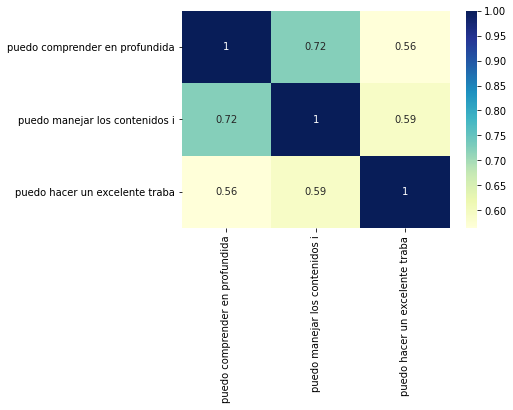

In [166]:
df = pd.read_excel('../tunned_student_data.xlsx')
df = df[(df[df.columns[61:63]] != 0).all(1)]
#df = df.reset_index()
df.rename(columns=lambda x: x[:30], inplace=True)

df_demographic = df[df.columns[:5]]
df_control_a = df[df.columns[5:8]]
df_control_b = df[df.columns[8:10]]
df_control_d = df[df.columns[10:13]]
df_control_f = df[df.columns[13:23]]

# It seems to belong to another poll
df_demographic_2 = df[df.columns[23:26]]
df_open_answer = df[df.columns[26:29]]
df_control_g = df[df.columns[29:31]]

df_unknown = df[df.columns[31:33]]
df_control_e = df[df.columns[33:36]]
df_x_a = df[df.columns[36:43]]
df_x_b = df[df.columns[43:46]]
df_x_c = df[df.columns[46:52]]
df_x_d = df[df.columns[52:55]]
df_satisfaction = df[df.columns[55:60]]
df_relative_student = df[df.columns[60:]]

# plotting correlation heatmap
dataplot = sns.heatmap(df_control_a.corr(), cmap="YlGnBu", annot=True)  
# displaying heatmap
plt.show()

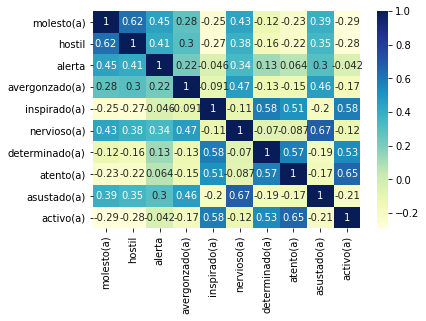

In [167]:
sns.heatmap(df_control_f.corr(), cmap="YlGnBu", annot=True) 
plt.show()

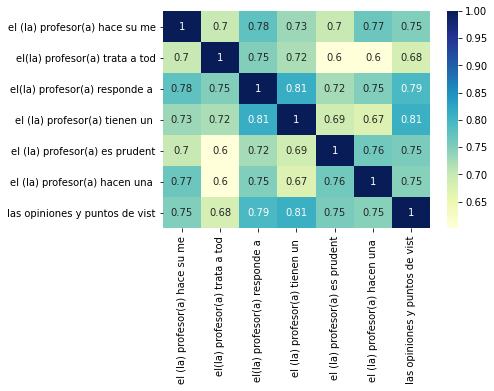

In [168]:
sns.heatmap(df_x_a.corr(), cmap="YlGnBu", annot=True) 
plt.show()

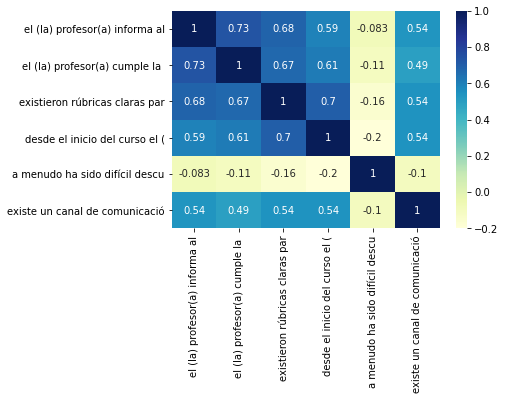

In [169]:
sns.heatmap(df_x_c.corr(), cmap="YlGnBu", annot=True) 
plt.show()

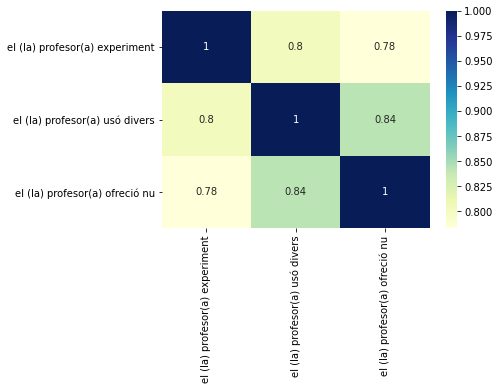

In [170]:
sns.heatmap(df_x_d.corr(), cmap="YlGnBu", annot=True) 
plt.show()

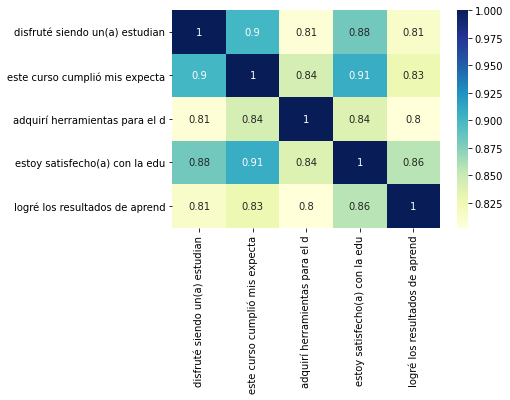

In [171]:
sns.heatmap(df_satisfaction.corr(), cmap="YlGnBu", annot=True) 
plt.show()

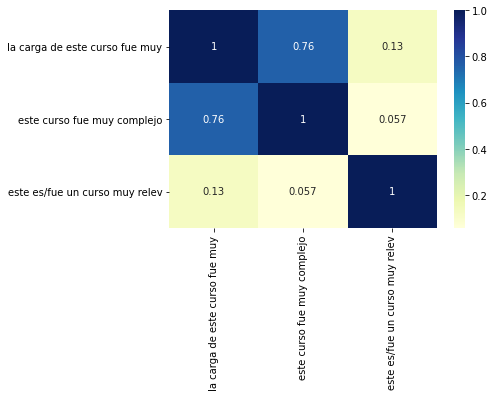

In [172]:
sns.heatmap(df_relative_student.corr(), cmap="YlGnBu", annot=True) 
plt.show()

In [173]:
df_demographic_2.carrera.tolist()


['Ingeniería civil industrial ',
 'Ingeniería Civil Industrial',
 'Ingeniería Civil Industrial',
 'Ingeniería civil industrial',
 'ICI',
 'Ingenieria civil industrial',
 'Ingeniería civil industrial',
 'Ingenieria Civil Industrial',
 'Ingeniería civil computación e informática',
 'Ingeniería Civil Industrial',
 'Civil industrial',
 'ingeniería civil industrial',
 'Ingeniería civil industrial ',
 'Ingeniería civil industrial',
 'Ingeniería Civil Industrial',
 'Ingeniería civil indsutrial',
 'Ingeniería Civil Industrial ',
 'Ingeniería Civil Industrial',
 'ingeniería civil industrial',
 'Ingeniería civil industrial',
 'ing civil industrial',
 'Ingeniería Civil Industrial ',
 'Ingeniería Civil Industrial ',
 'Ingeniería Civil Industrial - Coquimbo',
 'Ingeniería Civil Industrial',
 'ingenieria civil industrial',
 'Ingeniería Civil Industrial ',
 'ICI ',
 'Ingeniería civil industrial ',
 'Ingeniería civil industrial',
 'ingeniería civil industrial',
 'Ingeniería Civil Industrial',
 'Ingeni

## Tareas
* Separar por carreras
* Separar por asignaturas

In [138]:
import difflib

In [ ]:
difflib.get_close_matches